<a href="https://colab.research.google.com/github/eldorjonneymatov/mdev_ds_pract/blob/main/selfstudy/analyzing_poland_car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleaning and analysis using python

We analyze car prices in Poland using **numpy**, **pandas** and **matplotlib** libraries

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
%matplotlib inline

### Downloading the Dataset

We download the dataset from *kaggle* using `opendatasets`

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/aleksandrglotov/car-prices-poland')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: eldorjonneymatov
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 1.64M/1.64M [00:03<00:00, 487kB/s]


In [ ]:
import os

In [ ]:
os.listdir('car-prices-poland')

['Car_Prices_Poland_Kaggle.csv']

### Data preparation and cleaning

In [ ]:
cars_df = pd.read_csv('./car-prices-poland/Car_Prices_Poland_Kaggle.csv')

In [ ]:
cars_df.head()

Unnamed: 0  mark  model generation_name  year  mileage  vol_engine    fuel  \
0           0  opel  combo      gen-d-2011  2015   139568        1248  Diesel   
1           1  opel  combo      gen-d-2011  2018    31991        1499  Diesel   
2           2  opel  combo      gen-d-2011  2015   278437        1598  Diesel   
3           3  opel  combo      gen-d-2011  2016    47600        1248  Diesel   
4           4  opel  combo      gen-d-2011  2014   103000        1400     CNG   

              city     province  price  
0            Janki  Mazowieckie  35900  
1         Katowice      Śląskie  78501  
2            Brzeg     Opolskie  27000  
3        Korfantów     Opolskie  30800  
4  Tarnowskie Góry      Śląskie  35900

In [ ]:
cars_df.columns

Index(['Unnamed: 0', 'mark', 'model', 'generation_name', 'year', 'mileage',
       'vol_engine', 'fuel', 'city', 'province', 'price'],
      dtype='object')

We select the column `Unnamed: 0` as index and change its name to `index`

In [ ]:
cars_df.set_index('Unnamed: 0', inplace=True)
cars_df.index.name = 'index'
cars_df

mark  model    generation_name  year  mileage  vol_engine      fuel  \
index                                                                          
0        opel  combo         gen-d-2011  2015   139568        1248    Diesel   
1        opel  combo         gen-d-2011  2018    31991        1499    Diesel   
2        opel  combo         gen-d-2011  2015   278437        1598    Diesel   
3        opel  combo         gen-d-2011  2016    47600        1248    Diesel   
4        opel  combo         gen-d-2011  2014   103000        1400       CNG   
...       ...    ...                ...   ...      ...         ...       ...   
117922  volvo  xc-90  gen-ii-2014-xc-90  2020    40000        1969    Hybrid   
117923  volvo  xc-90  gen-ii-2014-xc-90  2017    51000        1969    Diesel   
117924  volvo  xc-90  gen-ii-2014-xc-90  2016    83500        1969  Gasoline   
117925  volvo  xc-90  gen-ii-2014-xc-90  2017   174000        1969    Diesel   
117926  volvo  xc-90  gen-ii-2014-xc-90  2016   189020        1969  Gasoline   

                    city       province   price  
index                                            
0                  Janki    Mazowieckie   35900  
1               Katowice        Śląskie   78501  
2                  Brzeg       Opolskie   27000  
3              Korfantów       Opolskie   30800  
4        Tarnowskie Góry        Śląskie   35900  
...                  ...            ...     ...  
117922          Katowice        Śląskie  222790  
117923  Chechło Pierwsze        Łódzkie  229900  
117924   Pruszcz Gdański      Pomorskie  135000  
117925            Kalisz  Wielkopolskie  154500  
117926            Sionna    Mazowieckie  130000  

[117927 rows x 10 columns]

In [ ]:
cars_df.shape

(117927, 9)

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   mark             117927 non-null  object
 1   model            117927 non-null  object
 2   generation_name  87842 non-null   object
 3   year             117927 non-null  int64 
 4   mileage          117927 non-null  int64 
 5   vol_engine       117927 non-null  int64 
 6   fuel             117927 non-null  object
 7   city             117927 non-null  object
 8   province         117927 non-null  object
 9   price            117927 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 9.9+ MB


Only the `generation_name` column has `nan` values. We will not use this column during the analysis, so we will drop it. 

In [ ]:
cars_df.drop('generation_name', axis=1, inplace=True)

In [ ]:
cars_df

mark  model  year  mileage  vol_engine      fuel              city  \
index                                                                         
0        opel  combo  2015   139568        1248    Diesel             Janki   
1        opel  combo  2018    31991        1499    Diesel          Katowice   
2        opel  combo  2015   278437        1598    Diesel             Brzeg   
3        opel  combo  2016    47600        1248    Diesel         Korfantów   
4        opel  combo  2014   103000        1400       CNG   Tarnowskie Góry   
...       ...    ...   ...      ...         ...       ...               ...   
117922  volvo  xc-90  2020    40000        1969    Hybrid          Katowice   
117923  volvo  xc-90  2017    51000        1969    Diesel  Chechło Pierwsze   
117924  volvo  xc-90  2016    83500        1969  Gasoline   Pruszcz Gdański   
117925  volvo  xc-90  2017   174000        1969    Diesel            Kalisz   
117926  volvo  xc-90  2016   189020        1969  Gasoline            Sionna   

             province   price  
index                          
0         Mazowieckie   35900  
1             Śląskie   78501  
2            Opolskie   27000  
3            Opolskie   30800  
4             Śląskie   35900  
...               ...     ...  
117922        Śląskie  222790  
117923        Łódzkie  229900  
117924      Pomorskie  135000  
117925  Wielkopolskie  154500  
117926    Mazowieckie  130000  

[117927 rows x 9 columns]

In [ ]:
cars_df.describe()

year       mileage     vol_engine         price
count  117927.000000  1.179270e+05  117927.000000  1.179270e+05
mean     2012.925259  1.409768e+05    1812.057782  7.029988e+04
std         5.690135  9.236936e+04     643.613438  8.482458e+04
min      1945.000000  0.000000e+00       0.000000  5.000000e+02
25%      2009.000000  6.700000e+04    1461.000000  2.100000e+04
50%      2013.000000  1.462690e+05    1796.000000  4.190000e+04
75%      2018.000000  2.030000e+05    1995.000000  8.360000e+04
max      2022.000000  2.800000e+06    7600.000000  2.399900e+06

According to https://www.everlance.com/blog/10-highest-mileage-vehicles, only a few vehicles have 1000000+ mileage. That's why we use only cars with less than 1000000 mileage.

In [ ]:
cars_df = cars_df[cars_df.mileage < 1000000]

In [ ]:
cars_df.year.unique()

array([2015, 2018, 2016, 2014, 2017, 2012, 1998, 1999, 2001, 2000, 2002,
       1996, 1997, 2004, 2007, 2008, 2006, 2005, 2003, 2013, 2019, 2021,
       2009, 2011, 2010, 2020, 1983, 2022, 1994, 1988, 1993, 1992, 1995,
       1991, 1973, 1986, 1989, 1987, 1990, 1985, 1981, 1952, 1964, 1972,
       1966, 1965, 1969, 1970, 1968, 1967, 1978, 1974, 1945, 1971],
      dtype=int64)

In [ ]:
cars_df.fuel.unique()

array(['Diesel', 'CNG', 'Gasoline', 'LPG', 'Hybrid', 'Electric'],
      dtype=object)

### Exploratory Analysis and Visualization

In [ ]:
backend_inline.set_matplotlib_formats('svg')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')

#### Mark
We find the number and percentage of cars of each mark

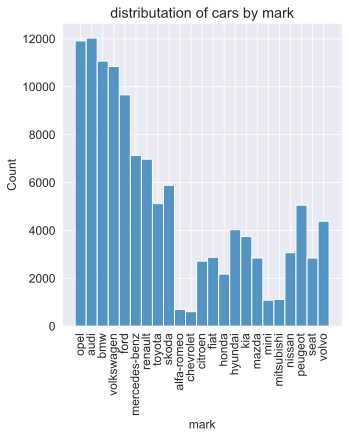

In [ ]:
sns.displot(data=cars_df, x='mark')
plt.xticks(rotation=90)
plt.title('distributation of cars by mark')
plt.show()

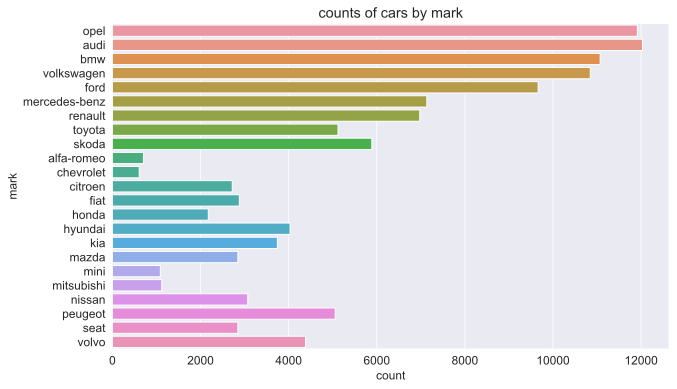

In [ ]:
sns.countplot(y=cars_df['mark'])
plt.title('counts of cars by mark')
plt.show()

In [ ]:
mark_pct = cars_df.mark.value_counts() * 100 / cars_df.mark.shape[0]

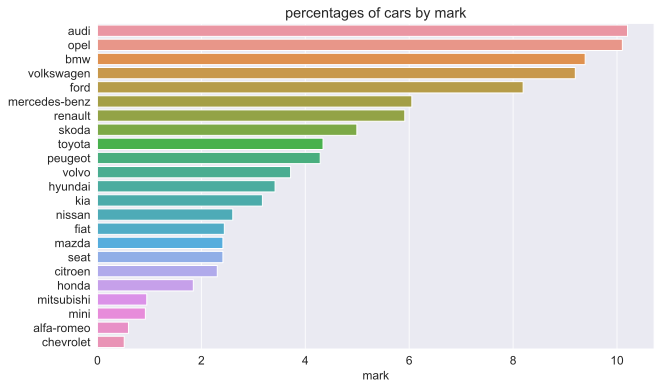

In [ ]:
sns.barplot(x=mark_pct, y=mark_pct.index)
plt.title('percentages of cars by mark')
plt.show()

#### Model
We will determine the models with the most cars

<Figure size 1296x1296 with 0 Axes>

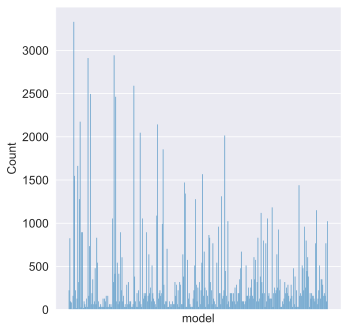

In [ ]:
sns.displot(data=cars_df, x='model')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.show()

In [ ]:
cars_df.model.nunique()

328

In [ ]:
top_models = cars_df.model.value_counts().sort_values(ascending=False).head(20)

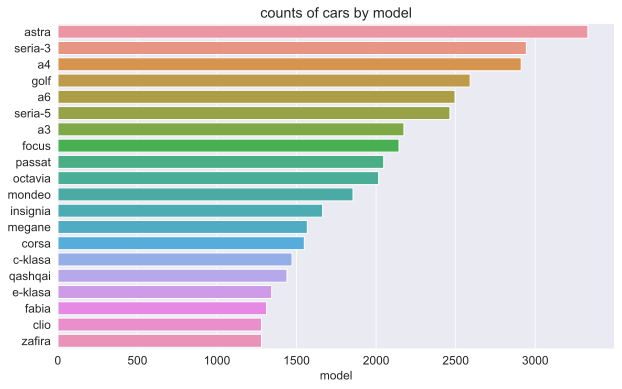

In [ ]:
sns.barplot(x=top_models, y=top_models.index)
plt.title('counts of cars by model')
plt.show()

#### Year
We find the number of cars by year

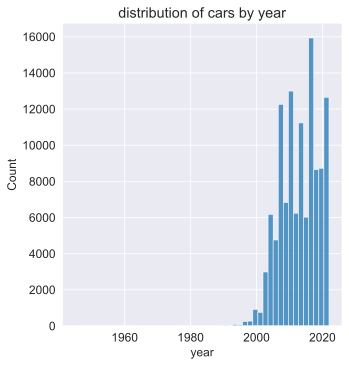

In [ ]:
sns.displot(bins=50,data=cars_df, x='year')
plt.title('distribution of cars by year')
plt.show()

In [ ]:
year_count = cars_df.year.value_counts().sort_index()

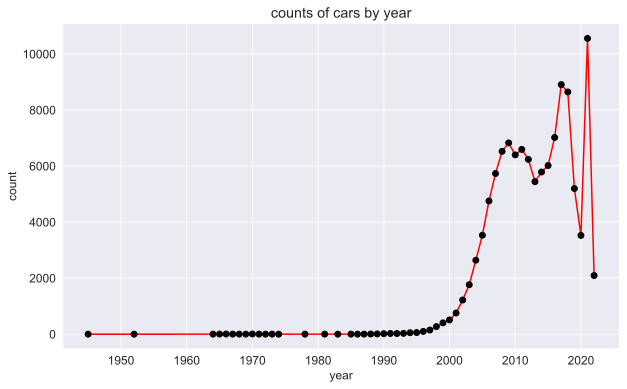

In [ ]:
plt.plot(year_count.index,year_count, c='r', marker='o', markeredgecolor='k', markerfacecolor='k')
plt.xlabel('year')
plt.ylabel('count')
plt.title('counts of cars by year')
plt.show()

It can be seen from the graph that most of the cars were manufactured after 2000

#### Fuel
We find the number and percentage of cars by fuel type

In [ ]:
fuel_count = cars_df.fuel.value_counts()
fuel_count

Gasoline    61597
Diesel      48473
LPG          4301
Hybrid       2620
Electric      885
CNG            47
Name: fuel, dtype: int64

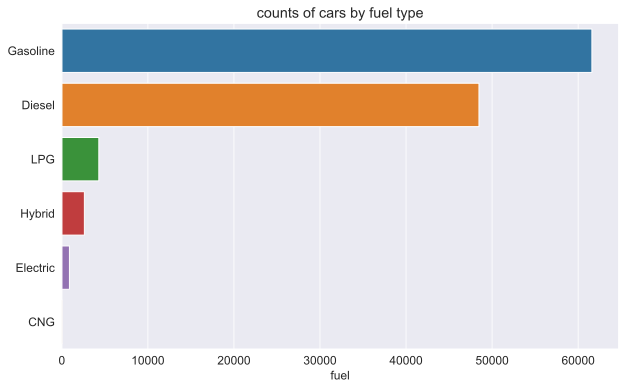

In [ ]:
sns.barplot(x=fuel_count,y=fuel_count.index)
plt.title('counts of cars by fuel type')
plt.show()

In [ ]:
fuel_pct = fuel_count / len(cars_df.fuel)

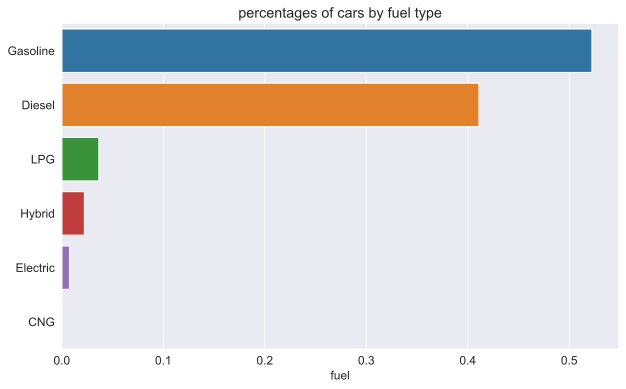

In [ ]:
sns.barplot(x=fuel_pct, y=fuel_pct.index)
plt.title('percentages of cars by fuel type')
plt.show()

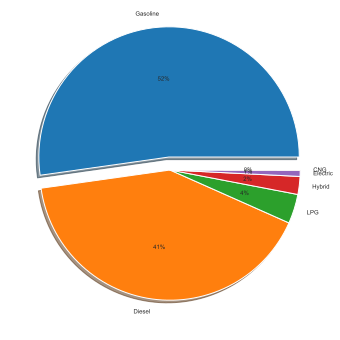

In [ ]:
colors = sns.color_palette('bright')
explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(fuel_count, labels=fuel_count.index, explode=explode, textprops={'fontsize': 6},autopct='%.0f%%', shadow=True)
plt.show()

It can be seen from the graph that more than half of the cars run on gas.

#### City
We will determine the cities with the most cars

In [ ]:
top_cities = cars_df.city.value_counts().sort_values(ascending=False).head(10)

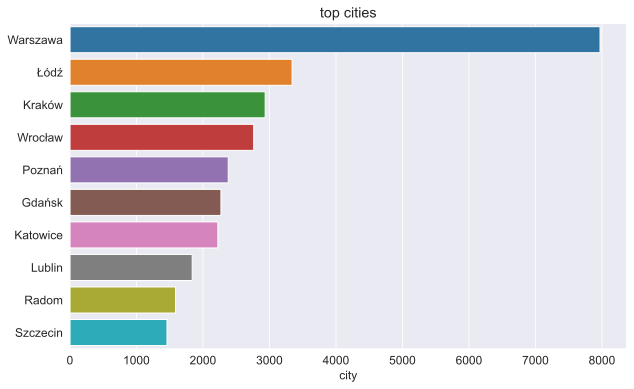

In [ ]:
sns.barplot(x=top_cities, y=top_cities.index)
plt.title('top cities')
plt.show()

[The cities with the highest number of cars are Poland's largest cities by population.](https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Poland)

### Asking and Answering Questions
Now ask and answer a few questions about the data frame

#### **What is the average car price for each province?**

For visualization, we determine the coordinates of each province using `geopy` module.

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myGeocode')

In [ ]:
city_province = cars_df.city + ', '+cars_df.province

In [ ]:
locations={}

In [ ]:
for pl in city_province.unique():
    loc = geolocator.geocode(pl)
    if loc:
        locations[pl] = [loc.longitude, loc.latitude]
    else:
        locations[pl] = np.nan

In [ ]:
cities=[]
provinces=[]
longitudes=[]
latitudes=[]
for key in locations:
    c_p = key.split(',')
    cities.append(c_p[0].strip())
    provinces.append(c_p[1].strip())
    if np.isnan(locations[key]).sum():
        longitudes.append(np.nan)
        latitudes.append(np.nan)
    else:
        longitudes.append(locations[key][0])
        latitudes.append(locations[key][1]) 

In [ ]:
city_province_df = pd.DataFrame({'city':cities, 'province':provinces, 'longitude':longitudes, 'latitude':latitudes})

In [ ]:
av_price = cars_df.groupby(['city','province'])['price'].mean()

In [ ]:
city_province_df['average_price'] = city_province_df.apply(
    lambda x: av_price[(x[0], x[1])],
    axis=1)

In [ ]:
city_province_df

city      province  longitude   latitude  average_price
0                    Janki   Mazowieckie  19.666667  52.333333   81826.218362
1                 Katowice       Śląskie  19.021585  50.259899   93091.319551
2                    Brzeg      Opolskie  17.464124  50.858865   41524.682927
3                Korfantów      Opolskie  17.598418  50.487978   67809.250000
4          Tarnowskie Góry       Śląskie  18.855476  50.444519   54922.112903
...                    ...           ...        ...        ...            ...
4771      Krężnica Okrągła     Lubelskie  22.247805  51.164760   30500.000000
4772        Kamionka Dolna  Podkarpackie  22.320618  50.424147   28500.000000
4773  Kolonia Gościeńczyce   Mazowieckie  20.955452  51.912284   34900.000000
4774            Augustówek   Mazowieckie  20.699444  52.374167  209000.000000
4775               Bledzew      Lubuskie  15.413957  52.517580  132000.000000

[4776 rows x 5 columns]

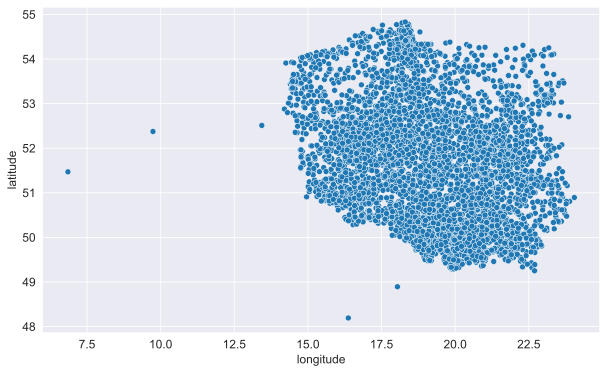

In [ ]:
sns.scatterplot(data=city_province_df, x='longitude', y='latitude')
plt.show()

We remove the edge points and `nan`s

In [ ]:
city_province_df.dropna(axis=0, inplace=True)
city_province_df = city_province_df[(city_province_df.longitude > 14)&(city_province_df.latitude > 49)]

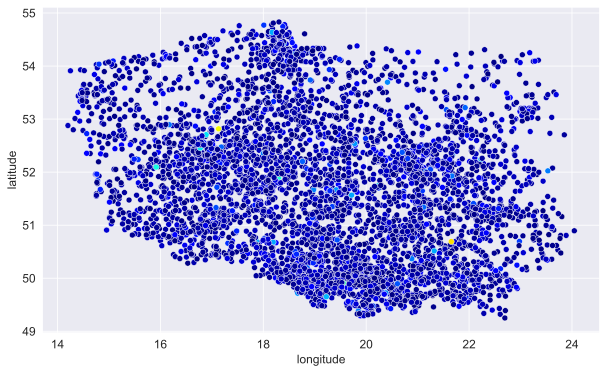

In [ ]:
sns.scatterplot(data=cr, x='longitude', y='latitude',
                c=cr.average_price, cmap=plt.get_cmap('jet'))
plt.show()

#### **What is the total number of cars in each province?**

In [ ]:
total_cars = cars_df.groupby(['city','province'])['price'].count()
city_province_df['car_count'] = city_province_df.apply(
    lambda x: total_cars[(x[0], x[1])],
    axis=1)
city_province_df

city      province  longitude   latitude  average_price  \
0                    Janki   Mazowieckie  19.666667  52.333333   81826.218362   
1                 Katowice       Śląskie  19.021585  50.259899   93091.319551   
2                    Brzeg      Opolskie  17.464124  50.858865   41524.682927   
3                Korfantów      Opolskie  17.598418  50.487978   67809.250000   
4          Tarnowskie Góry       Śląskie  18.855476  50.444519   54922.112903   
...                    ...           ...        ...        ...            ...   
4771      Krężnica Okrągła     Lubelskie  22.247805  51.164760   30500.000000   
4772        Kamionka Dolna  Podkarpackie  22.320618  50.424147   28500.000000   
4773  Kolonia Gościeńczyce   Mazowieckie  20.955452  51.912284   34900.000000   
4774            Augustówek   Mazowieckie  20.699444  52.374167  209000.000000   
4775               Bledzew      Lubuskie  15.413957  52.517580  132000.000000   

      car_count  
0           403  
1          2225  
2            41  
3             8  
4           434  
...         ...  
4771          1  
4772          1  
4773          1  
4774          1  
4775          1  

[4766 rows x 6 columns]

In [ ]:
sns.scatterplot(data=city_province_df, x='longitude', y='latitude',
                s=city_province_df.car_count/10)
plt.show()

#### **Which car model has the most expensive average price?**

In [ ]:
model_average_price = cars_df.groupby('model')['price'].mean()

In [ ]:
most_expensive_models = model_average_price.sort_values(ascending=False).head(15)
most_expensive_models

model
m8           823193.468750
amg-gt       639716.510417
seria-8      517424.437500
x7           516948.640625
rs6          482976.656250
e-tron       462646.312500
q8           432277.770833
m5           424472.953125
x5-m         401007.968750
m4           396008.187500
gls-klasa    389042.828125
g-klasa      382721.187500
x6-m         365267.781250
rs5          358715.875000
gle-klasa    348664.739583
Name: price, dtype: float64

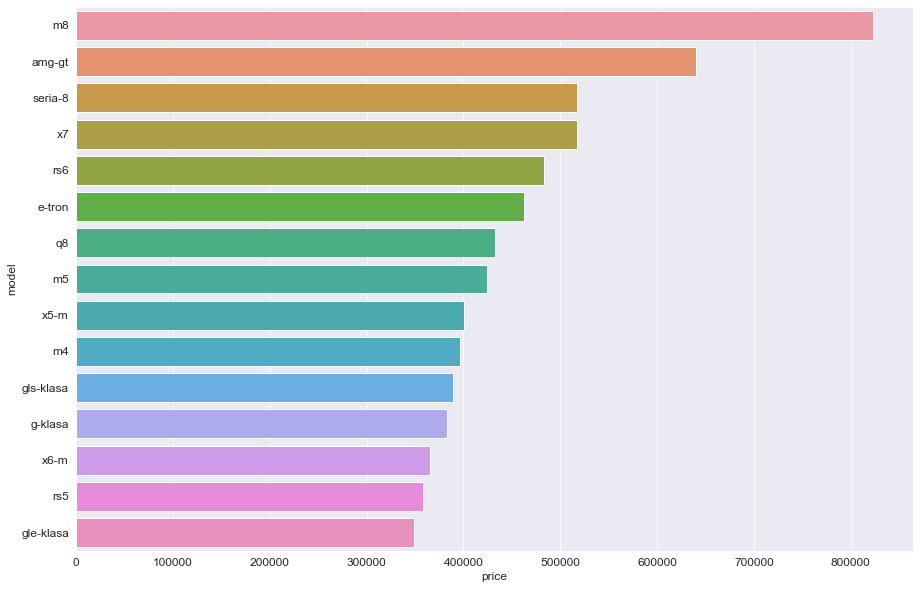

In [ ]:
sns.barplot(x=most_expensive_models,y=most_expensive_models.index)
plt.show()

#### According to the type of fuel, which cars have the most expensive average price?

In [ ]:
fuel_average_price = cars_df.groupby('fuel')['price'].mean().sort_values(ascending=False, inplace=False)

In [ ]:
fuel_average_price

fuel
Electric    193078.917514
Hybrid      169472.687023
Diesel       71965.668228
Gasoline     66054.888322
CNG          30979.829787
LPG          27013.299930
Name: price, dtype: float64

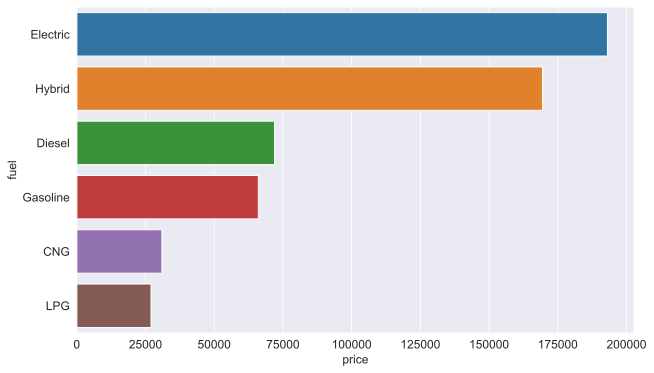

In [ ]:
sns.barplot(x=fuel_average_price, y=fuel_average_price.index)
plt.show()

As expected, electric cars are more expensive

#### What is the relationship between car mileage and price?

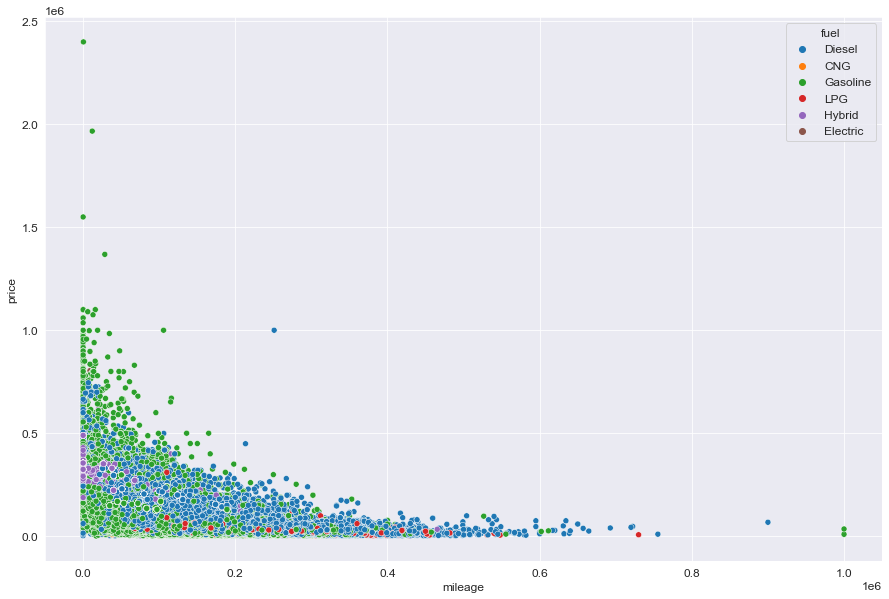

In [ ]:
backend_inline.set_matplotlib_formats('png')
plt.rcParams['figure.figsize'] = [15,10]
sns.scatterplot(data=cars_df, x='mileage', y='price', hue='fuel')
plt.show()

As can be seen from the graph, the greater the mileage on a car, the lower the price

#### What is the relationship between car mileage and year of manufacture?

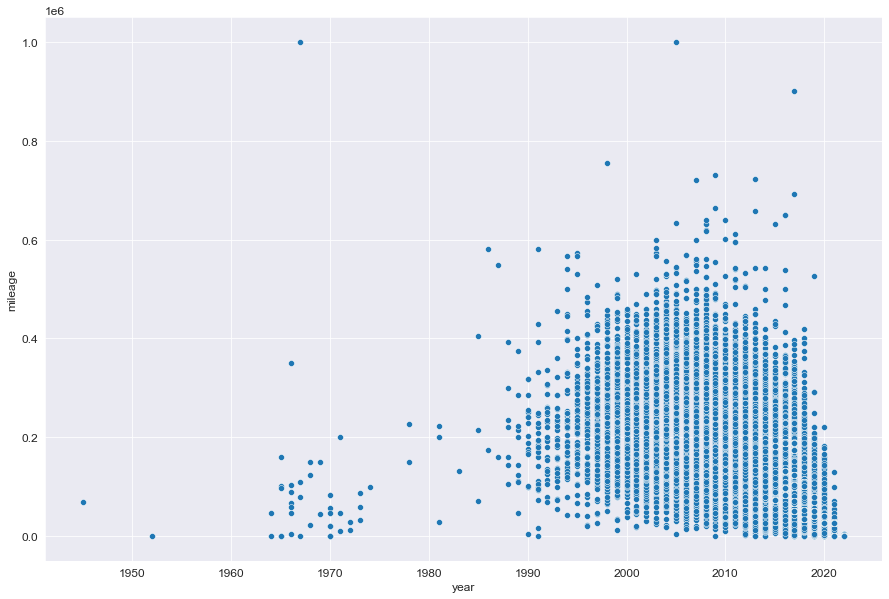

In [ ]:
backend_inline.set_matplotlib_formats('png')
plt.rcParams['figure.figsize'] = [15,10]
sns.scatterplot(data=cars_df, x='year', y='mileage')
plt.show()

As can be seen from the graph, the older the car, the higher the mileage.
<br>**PS**: Cars manufactured in recent years may have more mileage.

### Inferences and Conclusions

>* This data set contains the prices of cars of different marks, models, and types of fuel in Poland.
>* Most cars are manufactured in German companies.
>* Most of the cars were manufactured after 2000.
>* Most cars use gas and diesel fuel.
>* The number of cars in cities is proportional to the population.
>* The average prices of cars are evenly distributed throughout the country.
>* Electric cars are more expensive.
>* The greater the mileage on a car, the lower the price.
>* The older the car, the higher the mileage and new generation cars can travel more miles than old ones.